# Проект: выбор локации для скважины

**Задача**\
Добывающей компании «████████████» нужно решить, где бурить новую скважину.

Для этого нужно:
- построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль
- проаннализировать возможную прибыль и риски техникой *Bootstrap.*

**Данные**\
Пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

In [1]:
#импорт библиотек

import pandas as pd
import os
from io import BytesIO
import requests
import numpy as np
import phik

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Загрузка и подготовка данных

### Загрузим данные и сразу переведем все признаки в формат float

In [2]:
def data_import_os_request(data):
    pth1 = ( data + '.csv')
    pth2 = ('https://code.s3.yandex.net/datasets/' + data + '.csv')
    response = requests.get(pth2)
    
    if os.path.exists(pth1):
        df = pd.read_csv(pth1, sep=',', decimal=',', index_col = 'id').astype('float64')
        return df
    elif response.status_code==200:
        csv = BytesIO(response.content)
        df = pd.read_csv(csv, sep=',', decimal=',', index_col = 'id').astype('float64')
        return df
    else:
        print('Something is wrong')

In [3]:
geo_data_0 = data_import_os_request('██████')
geo_data_1 = data_import_os_request('██████')
geo_data_2 = data_import_os_request('██████')

### Посмотрим на первые строки данных, исследуем пропуски и дубликаты.

In [4]:
def data_main_info(data):
    try:
        print('-------------------------------------------------------------------------------')
        print('Первые 3 строки:')
        print('-------------------------------------------------------------------------------')
        display(data.head(3))
        print('-------------------------------------------------------------------------------')
        print('Описание данных:')
        print('-------------------------------------------------------------------------------')
        display(data.describe(include = "all"))
        print('-------------------------------------------------------------------------------')
        print('Общая информация о датафрейме')
        print('-------------------------------------------------------------------------------')
        display(data.info())
        print('-------------------------------------------------------------------------------')
        print('Исследование пропусков')
        print('-------------------------------------------------------------------------------')
        display(pd.DataFrame({'nan_qty' : data.isna().sum().sort_values(ascending=False), 
                  'nan_%' : round((data.isna().mean()*100), 1).sort_values(ascending=False)}))
        print('-------------------------------------------------------------------------------')
        print('Доля явных дубликатов')
        print('-------------------------------------------------------------------------------')
        print(f"{data.duplicated().sum() / data.shape[0] * 100:.2f}%")
    except:
        return 'Проверьте параметры'

In [5]:
data_main_info(██████)

-------------------------------------------------------------------------------
Первые 3 строки:
-------------------------------------------------------------------------------


,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647


-------------------------------------------------------------------------------
Описание данных:
-------------------------------------------------------------------------------


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


-------------------------------------------------------------------------------
Общая информация о датафрейме
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


None

-------------------------------------------------------------------------------
Исследование пропусков
-------------------------------------------------------------------------------


,nan_qty,nan_%
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


-------------------------------------------------------------------------------
Доля явных дубликатов
-------------------------------------------------------------------------------
0.00%


In [6]:
data_main_info(██████)

-------------------------------------------------------------------------------
Первые 3 строки:
-------------------------------------------------------------------------------


,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305


-------------------------------------------------------------------------------
Описание данных:
-------------------------------------------------------------------------------


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


-------------------------------------------------------------------------------
Общая информация о датафрейме
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


None

-------------------------------------------------------------------------------
Исследование пропусков
-------------------------------------------------------------------------------


,nan_qty,nan_%
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


-------------------------------------------------------------------------------
Доля явных дубликатов
-------------------------------------------------------------------------------
0.00%


In [7]:
data_main_info(██████)

-------------------------------------------------------------------------------
Первые 3 строки:
-------------------------------------------------------------------------------


,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910


-------------------------------------------------------------------------------
Описание данных:
-------------------------------------------------------------------------------


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


-------------------------------------------------------------------------------
Общая информация о датафрейме
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


None

-------------------------------------------------------------------------------
Исследование пропусков
-------------------------------------------------------------------------------


,nan_qty,nan_%
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


-------------------------------------------------------------------------------
Доля явных дубликатов
-------------------------------------------------------------------------------
0.00%


Видим, что первый регион сильно отличается от нулевого и второго: у него больше стандартные отклонения во входных признаках, а среднее значение целевого признака сильно ниже.

###  Визуализация добычи в регионах

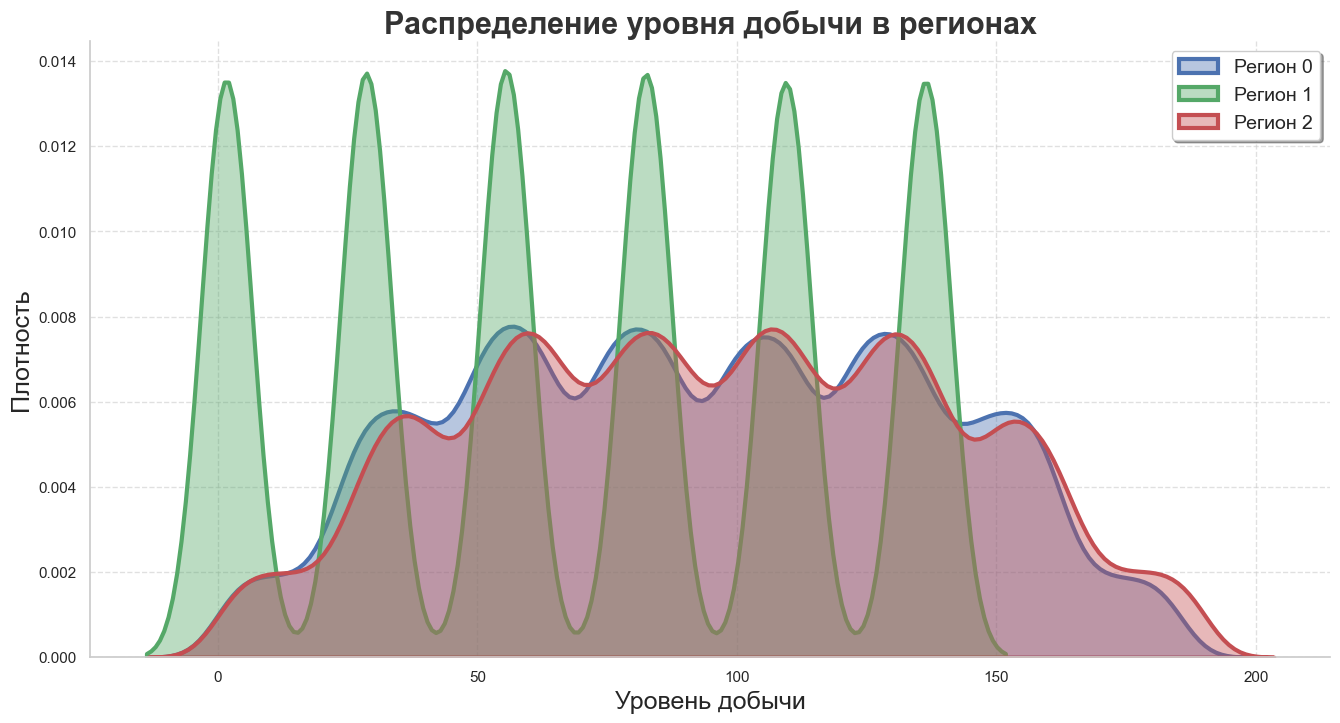

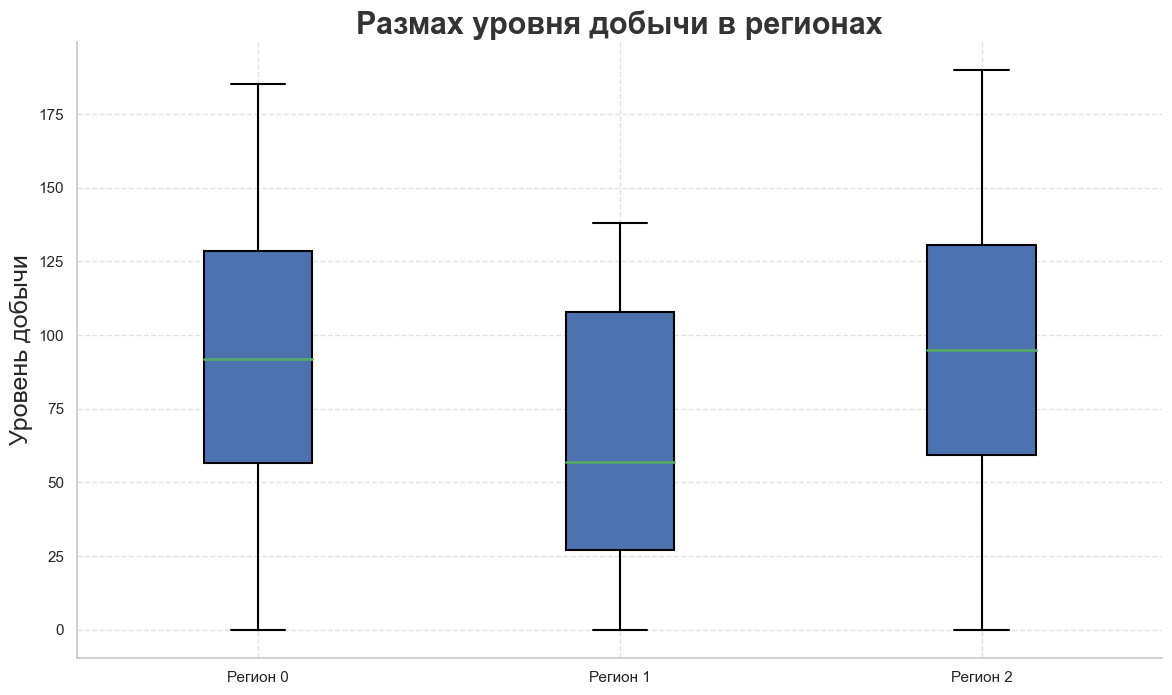

In [8]:
# Настройки общего стиля графиков
sns.set_theme(style="whitegrid")

# KDE график для распределения уровня добычи
plt.figure(figsize=(16, 8))
sns.kdeplot(██████['product'], label='Регион 0', color="#4C72B0", linewidth=3, fill=True, alpha=0.4)
sns.kdeplot(██████['product'], label='Регион 1', color="#55A868", linewidth=3, fill=True, alpha=0.4)
sns.kdeplot(██████['product'], label='Регион 2', color="#C44E52", linewidth=3, fill=True, alpha=0.4)

plt.title('Распределение уровня добычи в регионах', fontsize=22, fontweight='bold', color="#333333")
plt.xlabel('Уровень добычи', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.legend(fontsize=14, frameon=True, shadow=True, facecolor='white', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.show()

# Boxplot для размаха уровня добычи
plt.figure(figsize=(14, 8))
plt.boxplot([██████['product'], ██████['product'], ██████['product']], 
            labels=['Регион 0', 'Регион 1', 'Регион 2'], patch_artist=True,
            boxprops=dict(facecolor="#4C72B0", color="black", linewidth=1.5), 
            medianprops=dict(color="#55A868", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker='o', color='#55A868', markersize=6, alpha=0.5))

plt.title('Размах уровня добычи в регионах', fontsize=22, fontweight='bold', color="#333333")
plt.ylabel('Уровень добычи', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.show()

Да, видим, что по распределению и размаху целевого признака нулевой и второй регион похожи, а первый сильно от них отличается – данные там менее разнообразные.

### Корреляционнный анализ

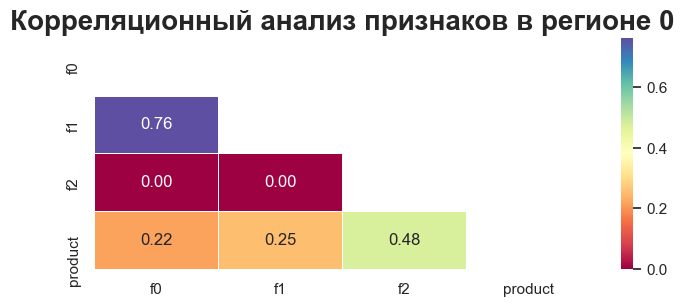

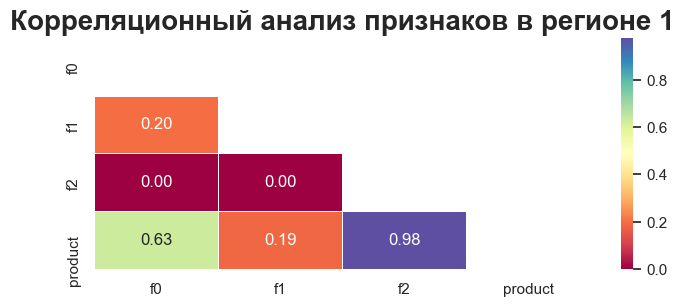

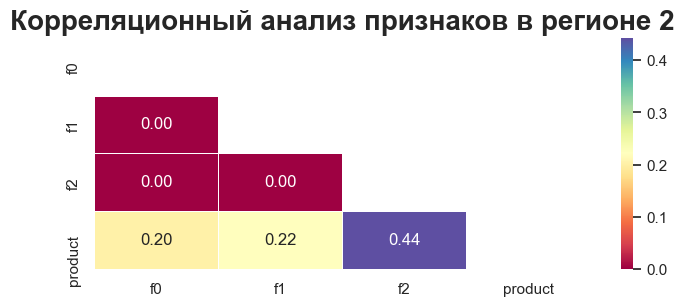

In [9]:
i = 0
for data in [██████, ██████, ██████]: 
    plt.figure(figsize=(8, 3))
    plt.grid(False)
    mask = np.triu(np.ones_like(data.loc[:, :'product'].phik_matrix(
        interval_cols = data.columns), dtype=bool));

    sns.heatmap(data.loc[:, :'product'].phik_matrix(
        interval_cols = data.columns),
                annot=True, fmt='.2f', mask=mask, cmap='Spectral', linewidths=0.5);
    plt.title(f'Корреляционный анализ признаков в регионе {i}', fontsize=20, fontweight='bold');
    i +=1

**Вывод**: ни в одном из датасетов мультиколлинеарности нет, все входные признаки показывают взаимосвязь с целевым.

## Обучение и проверка модели

In [10]:
scaler = StandardScaler()
model_lr = LinearRegression()

In [11]:
def do_predictions(df):
    X = df.drop('product', axis=1)
    y = df['product']
    
    # 2.1  Разбиваем данные на обучающую и валидационную выборки в соотношении 75:25
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, test_size=0.25, random_state=42)
    
    scaler.fit_transform(X_train)
    scaler.transform(X_valid)
    
    # 2.2  Обучаем модель и делаем предсказания на валидационной выборке
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_valid)
    predicted_product = model_lr.predict(X)
    
    # 2.3  Сохраним предсказания и правильные ответы на валидационной выборке
    data = {'reality' : y_valid,
           'predictions' : predictions}
    data = pd.DataFrame(data, columns = ['reality', 'predictions'])
    
    # 2.4  Определим средний запас предсказанного сырья и RMSE модели
    rmse = np.sqrt(mean_squared_error(data['reality'], data['predictions']))
    mean_predicted = data['predictions'].mean()
    
    return predicted_product, rmse, mean_predicted

In [12]:
geo_data_0['predicted_product'], rmse_0, mean_product_0 = do_predictions(██████)
geo_data_1['predicted_product'], rmse_1, mean_product_1 = do_predictions(██████)
geo_data_2['predicted_product'], rmse_2, mean_product_2 = do_predictions(██████)

data = pd.DataFrame({
    'Регион': ['Регион 0', 'Регион 1', 'Регион 2'],
    'RMSE': [rmse_0, rmse_1, rmse_2],
    'Средний запас': [mean_product_0, mean_product_1, mean_product_2]
})

data

,Регион,RMSE,Средний запас
0,Регион 0,37.756600,92.398800
1,Регион 1,0.890280,68.712878
2,Регион 2,40.145872,94.771024


Модель для первого региона ошибается меньше. Скорее всего, потому что в целевом признаке слишком мало уникальных значений, в отличие от остальных регионов.

In [13]:
for data in [██████, ██████, ██████]:
    for col in data.columns:
        print(f'Kоличество уникальных значений в признаке {col} = {data[col].nunique()}')
    print('')

Kоличество уникальных значений в признаке f0 = 100000
Kоличество уникальных значений в признаке f1 = 100000
Kоличество уникальных значений в признаке f2 = 100000
Kоличество уникальных значений в признаке product = 100000
Kоличество уникальных значений в признаке predicted_product = 100000

Kоличество уникальных значений в признаке f0 = 100000
Kоличество уникальных значений в признаке f1 = 100000
Kоличество уникальных значений в признаке f2 = 100000
Kоличество уникальных значений в признаке product = 12
Kоличество уникальных значений в признаке predicted_product = 100000

Kоличество уникальных значений в признаке f0 = 100000
Kоличество уникальных значений в признаке f1 = 100000
Kоличество уникальных значений в признаке f2 = 100000
Kоличество уникальных значений в признаке product = 100000
Kоличество уникальных значений в признаке predicted_product = 100000



## Подготовка к расчёту прибыли

Условия:
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет - 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

 ### Все ключевые значения для расчётов сохраним в отдельных переменных

In [14]:
RESEARCH_POINTS = 500
BEST_POINTS = 200
BUDGET = 10 ** 10
PRICE_PER_THOUSAND = 450_000
TRESHOLD = 0.025

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 

In [15]:
sufficient_price = BUDGET / BEST_POINTS

sufficient_production = sufficient_price / PRICE_PER_THOUSAND

data = pd.DataFrame({
    ' ': ['Достаточный объем', 'Средний запас в регионе 0', 'Средний запас в регионе 1', 'Средний запас в регионе 2'],
    'Запас': [sufficient_production, mean_product_0, mean_product_1, mean_product_2]
})

data

,,Запас
0,Достаточный объем,111.111111
1,Средний запас в регионе 0,92.398800
2,Средний запас в регионе 1,68.712878
3,Средний запас в регионе 2,94.771024


### Выводы по этапу подготовки расчёта прибыли

Видим, что если считать по всем точкам региона, то ни в одном из них средний запас не дотягивает до необходимого уровня, поэтому нужен этап бутстрепа, где мы случайным образом выберем 500 точек для исследования, а затем из них – 200 лучших на основе предсказаний модели.

## Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели: 

In [16]:
def revenue(data, count, price, budget):
    #  4.1. Выбираем скважины с максимальными значениями предсказаний 
    selected = data.sort_values(by='predicted_product', ascending=False)[:count]
    # 4.2 Суммируем целевое значение объёма сырья, соответствующее этим предсказаниям
    selected_volume = selected['product'].sum()
    # 4.3. Рассчитаем прибыль для полученного объёма сырья
    return price * selected_volume - budget

## Посчитаем риски и прибыль для каждого региона

### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

In [17]:
STATE = np.random.RandomState(12345)

def bootstrap_interval_and_risks(data):
    values = []
    
    for i in range(1000):
        subsample = (
            data
            .sample(n=RESEARCH_POINTS, random_state=STATE, replace=True)
            .sort_values(by='predicted_product', ascending=False)
            .head(BEST_POINTS)
        )
        rev = revenue(subsample, RESEARCH_POINTS, PRICE_PER_THOUSAND, BUDGET)
        values.append(rev)
            
    values = pd.Series(values)
    predicted_average_revenue = values.mean()
    lower = np.percentile(values, 2.5)
    upper = np.percentile(values, 97.5)
    risk = f'{((values < 0).mean() * 100):.1f}%'
    
    return values, predicted_average_revenue, lower, upper, risk

In [18]:
values_0, predicted_average_revenue_0, lower_0, upper_0, risk_0 = bootstrap_interval_and_risks(geo_data_0)
values_1, predicted_average_revenue_1, lower_1, upper_1, risk_1 = bootstrap_interval_and_risks(geo_data_1)
values_2, predicted_average_revenue_2, lower_2, upper_2, risk_2 = bootstrap_interval_and_risks(geo_data_2)

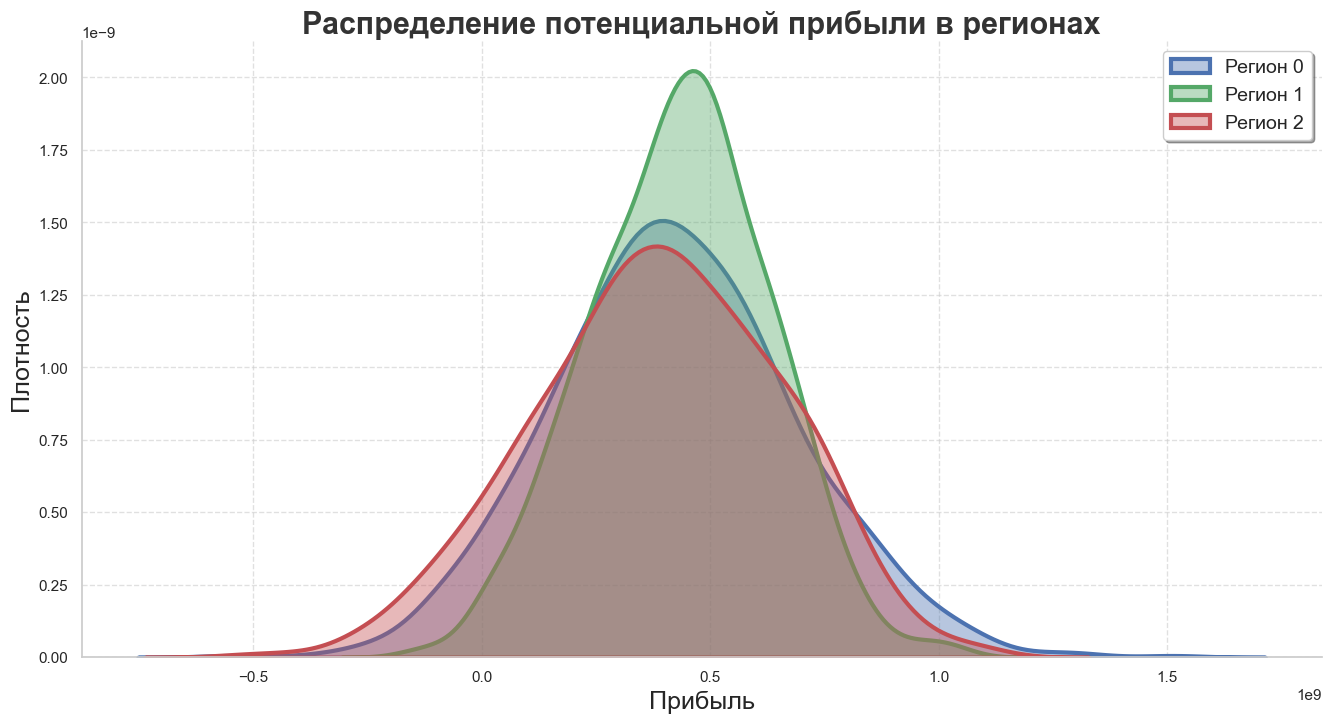

In [19]:
# Настройки общего стиля графиков
sns.set_theme(style="whitegrid")

# KDE график для распределения потенциальной прибыли
plt.figure(figsize=(16, 8))
sns.kdeplot(values_0, label='Регион 0', color="#4C72B0", linewidth=3, fill=True, alpha=0.4)
sns.kdeplot(values_1, label='Регион 1', color="#55A868", linewidth=3, fill=True, alpha=0.4)
sns.kdeplot(values_2, label='Регион 2', color="#C44E52", linewidth=3, fill=True, alpha=0.4)

plt.title('Распределение потенциальной прибыли в регионах', fontsize=22, fontweight='bold', color="#333333")
plt.xlabel('Прибыль', fontsize=18)
plt.ylabel('Плотность', fontsize=18)

plt.legend(fontsize=14, frameon=True, shadow=True, facecolor='white', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.show()

### Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков

In [20]:
data = pd.DataFrame({
    'Регион': ['Регион 0', 'Регион 1', 'Регион 2'],
    'Средняя прибыль': [predicted_average_revenue_0, predicted_average_revenue_1, predicted_average_revenue_2],
    '95%-й доверительный интервал': [f'{lower_0} - {upper_0}',
                                     f'{lower_1} - {upper_1}',
                                     f'{lower_2} - {upper_2}'],
    'Процент риска': [risk_0, risk_1, risk_2]
})

data

,Регион,Средняя прибыль,95%-й доверительный интервал,Процент риска
0,Регион 0,4.225651e+08,-88327335.4482982 - 965361459.6196806,5.2%
1,Регион 1,4.348214e+08,42419636.33193002 - 803845113.817385,1.0%
2,Регион 2,3.859816e+08,-146891041.0870358 - 877163010.3376101,8.5%


## Финальный вывод

**Бурить новую скважину нужно в регионе 0 – там риск провала наименьше всего, он составляет 5.2%.**

**Обоснование**:
От разработки региона 1 можно было отказаться еще на этапе загрузки данных, поскольку в значениях целевого признака всего 12 значений: с данными явно что-то не то. Дальше выбор стоял по сути между 0 и 2 регионами. По распределению и размаху целевого признака они очень похожи, однако на этапе бутстрепа выяснилось, что распределение потенциальной прибыли нулевого региона смещено немного правее, то есть прибыль там больше. Риск-анализ также подтвердил, что этот регион менее рискованный для бурения.